In [177]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [178]:
def read_cities_from_file(filename):
    cities = []
    with open(filename, "r") as file:
        for line in file:
            x, y = map(lambda s: int(float(s)), line.strip().split())
            cities.append((x, y))
    return cities

In [179]:
cities = read_cities_from_file("berlin52.tsp")

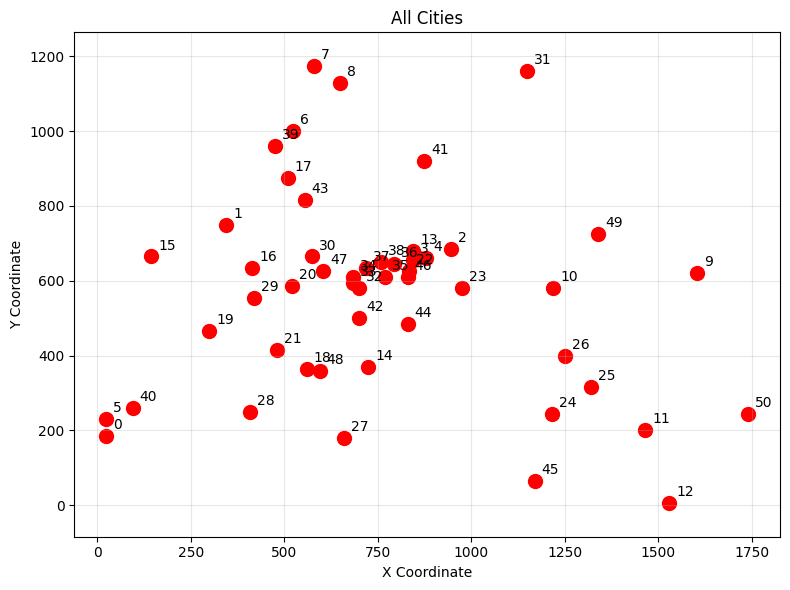

In [180]:
plt.figure(figsize=(8, 6))
plt.scatter([c[0] for c in cities], [c[1] for c in cities], c="red", s=100)
for i, (x, y) in enumerate(cities):
    plt.annotate(f"{i}", (x, y), xytext=(5, 5), textcoords="offset points", fontsize=10)
plt.title("All Cities")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True, alpha=0.3)
plt.axis("equal")
plt.tight_layout()
plt.show()

In [181]:
def get_distance_matrix(cities):
    n = len(cities)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dist_matrix[i][j] = np.sqrt(
                (cities[i][0] - cities[j][0]) ** 2 + (cities[i][1] - cities[j][1]) ** 2
            )
    return dist_matrix

In [182]:
def calculate_total_distance(path, dist_matrix):
    total_dist = 0
    n = len(path)
    for i in range(n):
        total_dist += dist_matrix[path[i]][path[(i + 1) % n]]
    return total_dist

In [183]:
def generate_neighbor_2opt(path):
    n = len(path)
    i, j = random.sample(range(n), 2)
    if i > j:
        i, j = j, i
    new_path = path[:i] + path[i : j + 1][::-1] + path[j + 1 :]
    return new_path

In [184]:
def simulated_annealing(
    cities, initial_temp=1000, final_temp=0.1, alpha=0.99, max_iterations=10000
):
    n_cities = len(cities)
    dist_matrix = get_distance_matrix(cities)

    current_solution = list(range(n_cities))
    random.shuffle(current_solution)
    current_cost = calculate_total_distance(current_solution, dist_matrix)

    best_solution = list(current_solution)
    best_cost = current_cost

    temp = initial_temp
    cost_history = [current_cost]

    print(f"Initial Cost: {current_cost:.2f}")

    for it in range(max_iterations):
        if temp < final_temp:
            break

        neighbor = generate_neighbor_2opt(current_solution)
        neighbor_cost = calculate_total_distance(neighbor, dist_matrix)

        delta = neighbor_cost - current_cost

        if delta < 0 or random.random() < np.exp(-delta / temp):
            current_solution = neighbor
            current_cost = neighbor_cost

            if current_cost < best_cost:
                best_cost = current_cost
                best_solution = list(current_solution)

        cost_history.append(current_cost)
        temp *= alpha

        if (it + 1) % 100 == 0:
            print(f"Iteration {it + 1}/{max_iterations} Best Cost: {best_cost:.2f}")

    return best_solution, best_cost, cost_history

**initial_temp** -> Temperatura inițială, un parametru care controlează probabilitatea de acceptare a soluțiilor mai proaste la început apoi valori mai mari permit explorarea mai largă.

**final_temp** -> Temperatura finală, pragul la care algoritmul se oprește când temperatura scade sub această valoare, căutarea se încheie.

**alpha** -> Rata de răcire, factorul cu care temperatura scade în fiecare iterație (de exemplu, 0.99 înseamnă scădere exponențială) valori mai apropiate de 1 răcesc mai lent.

**max_iterations** -> Numărul maxim de iterații pe care algoritmul le execută pentru a căuta o soluție optimă.

In [185]:
final_path, final_cost, history = simulated_annealing(
    cities, initial_temp=10000, final_temp=0.0000000001, alpha=0.99, max_iterations=10000
)

Initial Cost: 29379.74
Iteration 100/10000 Best Cost: 24789.51
Iteration 200/10000 Best Cost: 24789.51
Iteration 300/10000 Best Cost: 24789.51
Iteration 400/10000 Best Cost: 20366.56
Iteration 500/10000 Best Cost: 17972.09
Iteration 600/10000 Best Cost: 16610.34
Iteration 700/10000 Best Cost: 14238.18
Iteration 800/10000 Best Cost: 13664.42
Iteration 900/10000 Best Cost: 12706.25
Iteration 1000/10000 Best Cost: 12211.82
Iteration 1100/10000 Best Cost: 11549.49
Iteration 1200/10000 Best Cost: 11277.36
Iteration 1300/10000 Best Cost: 10778.29
Iteration 1400/10000 Best Cost: 9657.25
Iteration 1500/10000 Best Cost: 9527.58
Iteration 1600/10000 Best Cost: 9394.24
Iteration 1700/10000 Best Cost: 9360.43
Iteration 1800/10000 Best Cost: 9239.90
Iteration 1900/10000 Best Cost: 9235.60
Iteration 2000/10000 Best Cost: 9056.46
Iteration 2100/10000 Best Cost: 9056.46
Iteration 2200/10000 Best Cost: 9050.02
Iteration 2300/10000 Best Cost: 8853.76
Iteration 2400/10000 Best Cost: 8695.96
Iteration 250

In [186]:
print(f"Final Optimized Cost: {final_cost:.2f}")

Final Optimized Cost: 8232.96


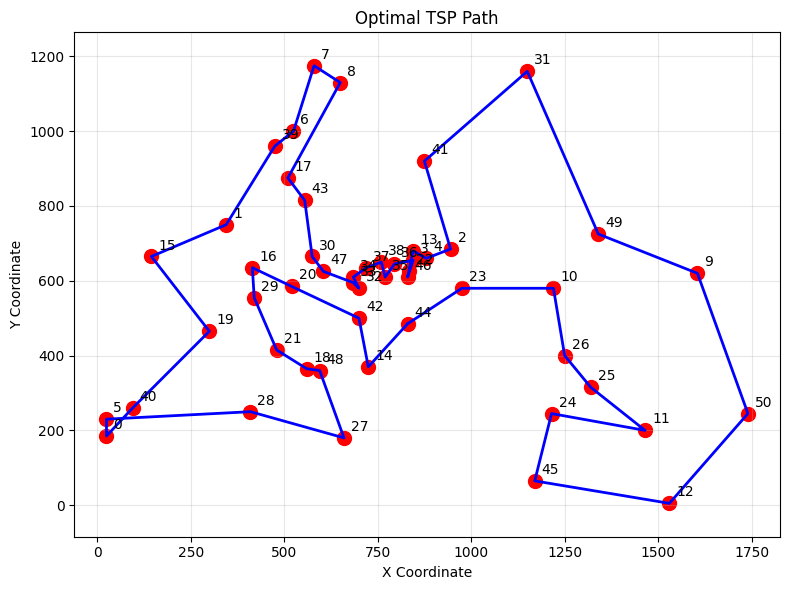

In [187]:
plt.figure(figsize=(8, 6))
path_x = [cities[i][0] for i in final_path + [final_path[0]]]
path_y = [cities[i][1] for i in final_path + [final_path[0]]]
plt.plot(path_x, path_y, "b-", linewidth=2)

plt.scatter([c[0] for c in cities], [c[1] for c in cities], c="red", s=100)
for i, (x, y) in enumerate(cities):
    plt.annotate(f"{i}", (x, y), xytext=(5, 5), textcoords="offset points", fontsize=10)
plt.title("Optimal TSP Path")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True, alpha=0.3)
plt.axis("equal")
plt.tight_layout()
plt.show()